# K-means algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def importImage(imdir):
    
    im_array = plt.imread(imdir)
    im_array = (im_array * 255).astype(np.int64)
    im_array = im_array[:,:,:3]

    height = np.shape(im_array)[0]
    width = np.shape(im_array)[1]
    
    channels = np.shape(im_array)[2]
    
    return im_array, width, height, channels

image :  (100, 100, 3)


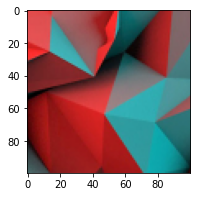

In [3]:
image_dir = "./triangles.png"
image0, width, height, channels = importImage(image_dir)
print("image : ", np.shape(image0))

fig = plt.figure(figsize=(3,3))
ax = plt.axes()
ax.imshow(image0, aspect='equal')

convert image into a single array of (#elements by #channels)

In [4]:
def assign(data, means):
    # get distances from each point to each centroid: array (width*height,k)
    dists = np.zeros( (width*height,k), dtype="int64" )
    # for each cluster
    for i in range(k):
        # euclidean distance
        dists[:,i] = np.sqrt( np.sum( np.power( (data - means[i]), 2 ), axis = 1 ) )
    
    # each cluster's element is assigned the values of the closest centroid
    clusts = np.zeros( (width*height,3), dtype="int64" )
    clusts = means[ np.argmin( dists, axis=1 ) ]
    
    return clusts

#calculates new centroids
def update( clusts, data, means ):
    new_means = []
    for a, elms in zip(range(k), getElementCounts(clusts, means)): # there migh be a more efficient way other than zip
        # sum of each channel from all elements of each cluster
        sums = np.sum( np.where( clusts == means[a], data, 0 ), axis=0 )
        # calculate new average of each channel
        new_means.append( np.divide( sums, elms ).astype(np.uint16) )
    
    return np.asarray( new_means, dtype="int64" )

# clusters, means
def getElementCounts(clusters, means):
    counts = []
    for centroid in means:
        array = np.where( clusters == centroid, clusters, 0 )
        counts.append( np.sum( np.where( array.any(axis = 1), 1, 0 ) ) )
        
    return np.asarray(counts)

In [5]:
data = np.reshape(image0, (height*width, 3))
print("data : ", np.shape(data))

k = 5
print("k =", k, "\n")

means = data[np.random.randint(0, height*width, size=k),:]
means0 = np.copy( means )
print("means :")
print(means0, "\n")

max_iterations = 10
i = 0
while True:
    clusters = assign(data, means)
    
    if i == max_iterations:
        break
        
    means = update(clusters, data, means)
    i += 1

dominantColor = means[np.argmax(getElementCounts(clusters, means))]

data :  (10000, 3)
k = 5 

means :
[[205  32  31]
 [151 127 123]
 [ 49 156 160]
 [ 34  82  86]
 [155  25  26]] 



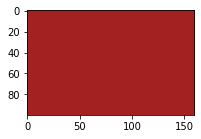

In [6]:
block = np.ones((100,160,3), dtype=np.uint8)*dominantColor
fig = plt.figure(figsize=(3,3))
ax = plt.axes()
ax.imshow(block, aspect='equal')

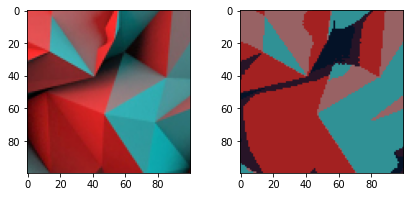

In [7]:
image = np.reshape( clusters, (height, width, 3) )

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (7,3))
ax1.imshow(image0, aspect = "equal")
ax2.imshow(image, aspect = "equal")

In [8]:
%%timeit

data = np.reshape(image0, (height*width, 3))

k = 5

means = data[np.random.randint(0, height*width, size=k),:]
means0 = np.copy( means )

max_iterations = 10
i = 0
while i < max_iterations:
    clusters = assign(data, means)
    means = update(clusters, data, means)
    i += 1
    
dominantColor = means[np.argmax(getElementCounts(clusters, means))]

86.5 ms ± 7.69 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
